In [2]:
import pandas as pd
import re
import spacy
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords  # Import stopwords here

# Download NLTK resources if necessary
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Load the spaCy English model
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    import os
    os.system("python -m spacy download en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Load the dataset
file_path = r'/Users/praveenkumarm/Desktop/Guvi_Projects/Ecom_Recommandation/Mobile_Phone_Data.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Loaded dataset with {df.shape[0]} reviews.")
except Exception as e:
    print(f"Error loading the dataset: {e}")
    exit()  # Exit if dataset fails to load

# Assign 'product_id' as Product Name
df['product_id'] = df['Product Name']

# Remove rows with missing values in 'Review', 'Rating', and 'Price'
df.dropna(subset=['Review', 'Rating', 'Price'], inplace=True)

# Cleaning the Review Text
def clean_review(text):
    """Remove HTML tags, special characters, emojis, and convert to lowercase."""
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove emojis using regex
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Removes non-ASCII characters (including emojis)
    # Remove special characters, numbers (only keep alphabets)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning function to reviews
df['Cleaned_Review'] = df['Review'].apply(clean_review)

# Tokenization, stopword removal, and lemmatization
stop_words = set(stopwords.words('english'))

def tokenize_and_normalize(text):
    """Tokenize, remove stopwords, and apply lemmatization."""
    doc = nlp(text)  # Tokenize and lemmatize using spaCy
    # Remove stopwords, punctuation, and retain only alphabetic tokens
    words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(words)

# Apply tokenization and normalization
df['Tokenized_Review'] = df['Cleaned_Review'].apply(tokenize_and_normalize)

# Convert 'Rating' to numeric and filter out invalid entries
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df[df['Rating'].notnull()]

# Convert 'Price' to numeric (remove currency symbols and commas)
df['Price'] = df['Price'].apply(lambda x: re.sub(r'[^\d]', '', str(x)))  # Remove non-numeric characters
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric

# Filter rows where the price is between ₹35,000 and ₹40,000
df = df[(df['Price'] >= 35000) & (df['Price'] <= 40000)]

# Drop duplicates if necessary
df.drop_duplicates(inplace=True)

# Remove the 'Product Link' column
df.drop(columns=['Product Link'], inplace=True)

# Save the cleaned and processed data to a new CSV file
output_path = '/Users/praveenkumarm/Desktop/Guvi_Projects/Ecom_Recommandation/FlipKart_Dataset.csv'
df.to_csv(output_path, index=False)
print(f"Processed data saved to {output_path}.")

# Display the first few rows of the cleaned data
print(df.head())

# Plot Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution of Products')
plt.xlabel('Price (₹)')
plt.ylabel('Number of Products')
plt.grid(axis='y')
plt.show()

# Calculate average rating for each product
avg_rating = df.groupby('product_id').agg(Avg_Rating=('Rating', 'mean')).reset_index()

# Get the top 10 products by average rating
top_n = avg_rating.sort_values(by='Avg_Rating', ascending=False).head(10)

# Horizontal Bar Plot for Top N Products
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Rating', y='product_id', data=top_n, palette='coolwarm')
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product ID')
plt.grid(axis='x')
plt.show()


ModuleNotFoundError: No module named 'pandas'

Sentiment Analysis 

Sentiment analysis results with TextBlob saved to /Users/praveenkumarm/Desktop/Guvi_Projects/Ecom_Recommandation/FlipKart_Dataset_with_Sentiment_Analysis.csv.
                                        Product Name  \
0  SAMSUNG Galaxy S23 5G (Phantom Black, 128 GB) ...   
1  SAMSUNG Galaxy S23 5G (Phantom Black, 128 GB) ...   
2  SAMSUNG Galaxy S23 5G (Phantom Black, 128 GB) ...   
3  SAMSUNG Galaxy S23 5G (Phantom Black, 128 GB) ...   
4  SAMSUNG Galaxy S23 5G (Phantom Black, 128 GB) ...   

                                      Cleaned_Review TextBlob_Sentiment  \
0  samsung galaxy s series great features at attr...           Positive   
1                from iphone mini to this best phone  Strongly Positive   
2  upgraded from iphone mini to s fulfilling my n...  Strongly Positive   
3      amazing camera good feel in hand good battery  Strongly Positive   
4               worth the wait upgraded from pixel a           Positive   

   TextBlob_Sentiment_Score  
0                  0.31

/var/folders/d_/9rk_x52d4g3fwy1nj6n0c_cm0000gn/T/ipykernel_4987/1748975282.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TextBlob_Sentiment', data=df, palette='pastel',


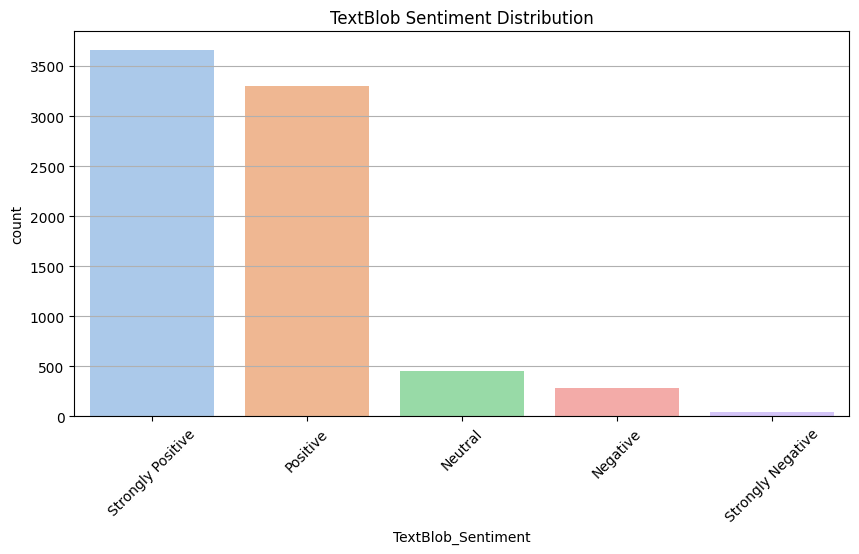

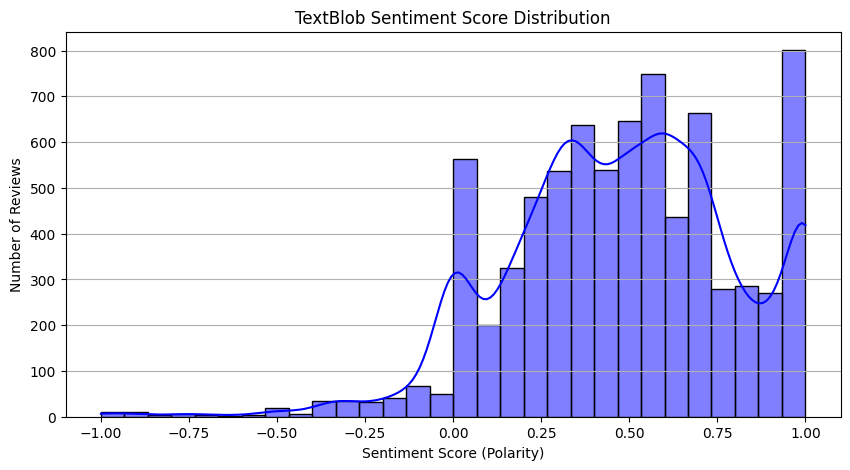

Top 5 Products Based on TextBlob Sentiment Analysis:
                                                   avg_textblob_sentiment_score  \
Product Name                                                                      
vivo V40 5G (Titanium Grey, 256 GB)  (8 GB RAM)                        0.589686   
vivo V40 5G (Lotus Purple, 256 GB)  (8 GB RAM)                         0.589686   
vivo V40 5G (Ganges Blue, 256 GB)  (8 GB RAM)                          0.589686   
vivo V27 Pro 5G (Magic Blue, 256 GB)  (8 GB RAM)                       0.584045   
vivo V27 Pro 5G (Noble Black, 128 GB)  (8 GB RAM)                      0.584045   

                                                   total_textblob_positive_reviews  \
Product Name                                                                         
vivo V40 5G (Titanium Grey, 256 GB)  (8 GB RAM)                                 29   
vivo V40 5G (Lotus Purple, 256 GB)  (8 GB RAM)                                  29   
vivo V40 5G (Ganges B

In [4]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
file_path = '/Users/praveenkumarm/Desktop/Guvi_Projects/Ecom_Recommandation/FlipKart_Dataset.csv'
df = pd.read_csv(file_path)

# TextBlob Sentiment Analysis Function
def get_textblob_sentiment(text):
    """Determine sentiment polarity using TextBlob."""
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Polarity score (-1 to 1)
    
    # Categorize based on polarity thresholds
    if polarity > 0.5:
        sentiment = 'Strongly Positive'
    elif 0 < polarity <= 0.5:
        sentiment = 'Positive'
    elif polarity == 0:
        sentiment = 'Neutral'
    elif -0.5 <= polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Strongly Negative'
    
    return polarity, sentiment

# Apply TextBlob sentiment analysis
df['TextBlob_Sentiment_Score'], df['TextBlob_Sentiment'] = zip(*df['Cleaned_Review'].apply(get_textblob_sentiment))

# Save the updated DataFrame with TextBlob sentiment analysis
output_path = '/Users/praveenkumarm/Desktop/Guvi_Projects/Ecom_Recommandation/FlipKart_Dataset_with_Sentiment_Analysis.csv'
df.to_csv(output_path, index=False)
print(f"Sentiment analysis results with TextBlob saved to {output_path}.")

# Display the first few rows with sentiment analysis
print(df[['Product Name', 'Cleaned_Review', 'TextBlob_Sentiment', 'TextBlob_Sentiment_Score']].head())

# Visualization: TextBlob Sentiment Distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='TextBlob_Sentiment', data=df, palette='pastel', 
              order=['Strongly Positive', 'Positive', 'Neutral', 'Negative', 'Strongly Negative'])
plt.title('TextBlob Sentiment Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Histogram of TextBlob Sentiment Scores
plt.figure(figsize=(10, 5))
sns.histplot(df['TextBlob_Sentiment_Score'], bins=30, kde=True, color='blue')
plt.title('TextBlob Sentiment Score Distribution')
plt.xlabel('Sentiment Score (Polarity)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.show()

# Aggregation: Average Sentiment Score by Product
product_sentiment_summary = df.groupby('Product Name').agg(
    avg_textblob_sentiment_score=('TextBlob_Sentiment_Score', 'mean'),
    total_textblob_positive_reviews=('TextBlob_Sentiment', lambda x: (x == 'Positive').sum()),
    total_reviews=('TextBlob_Sentiment', 'count')  # Using TextBlob_Sentiment for review count
).sort_values(by='avg_textblob_sentiment_score', ascending=False)

# Show the top 5 products based on TextBlob average sentiment score
print("Top 5 Products Based on TextBlob Sentiment Analysis:")
print(product_sentiment_summary.head())

# Save the product sentiment summary for future use in recommendation systems
summary_output_path = '/Users/praveenkumarm/Desktop/Guvi_Projects/Ecom_Recommandation/Product_Sentiment_Summary_TextBlob.csv'
product_sentiment_summary.to_csv(summary_output_path)
print(f"Product sentiment summary saved to {summary_output_path}.")
